In [15]:
import argparse
from argparse import Namespace
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import json
import os
import numpy
import e57
import cv2
import open3d as o3d
import laspy

from PCDprocessing.pcd2img import project_PCD2ERP
from PCDprocessing.img2pcd import project_ERP_to_PCD
from segmentations.segmentation import segmentation_img, human_labeling

In [42]:
### Modularized test (all-in-one)
## PCD setting
targets = ['Aisle', 'Elevator', 'LectureRoom1','LectureRoom2_1', 'LectureRoom2_2']
def args_comp(target):
    args1 = argparse.Namespace(
        model='BEiT_ADE',
        pcd_path='./../daeyoung/CustomPCD/(Test)'+target+'_origin.e57',
        img_width=1800,
        img_height=900,
        )
    args2 = argparse.Namespace(
        model='BEiT_ADE',
        pcd_path='./../daeyoung/CustomPCD/(Test)'+target+'_cleaned.e57',
        img_width=1800,
        img_height=900,
        )
    return args1, args2

## target index
for target_idx in range(len(targets)):
    print("Test on room of {} is being started".format(targets[target_idx]))

    (arg1, arg2) = args_comp(targets[target_idx])
    prj_im_origin = project_PCD2ERP(arg1)
    prj_im_cleaned = project_PCD2ERP(arg2)

    ## Save projected images
    cv2.imwrite("./../daeyoung/CustomPCD/imgs/"+targets[target_idx]+"_origin.png", prj_im_origin)
    cv2.imwrite("./../daeyoung/CustomPCD/imgs/"+targets[target_idx]+"_cleaned.png", prj_im_cleaned)

    ## image segmentation
    human_mask = segmentation_img("./../daeyoung/CustomPCD/imgs/"+targets[target_idx]+"_origin.png", arg1)
    pred_img = human_labeling(prj_im_origin, human_mask, mask_color=(0,255,0))
    cv2.imwrite("./../daeyoung/CustomPCD/imgs/"+targets[target_idx]+"_predicted.png", pred_img)

    ## image projection
    pred_pcd = project_ERP_to_PCD(arg1, pred_img)

    ## Read original and cleaned PCDs
    origin_pcd = e57.read_points(arg1.pcd_path)
    cleaned_pcd = e57.read_points(arg2.pcd_path)

    ## The number of Human Predicted points
    target_num = 0
    xyz_values = []
    for preds in tqdm(pred_pcd):
        rgb_values = preds[3:]
        ## Human Predicted points
        if np.array_equal(rgb_values, (0,255,0)):
            target_num += 1
            xyz_values.append(preds[:3])

    ## The number of Overlapped points of human predicted
    clPCD_set = set(map(tuple, np.round(cleaned_pcd.points, decimals=3)))
    prPCD_set = set(map(tuple, np.round(np.array(xyz_values), decimals=3)))
    overlp_pts = clPCD_set & prPCD_set

    print("Test results on {} are below".format(str(targets[target_idx])))
    print("Total number of points of Original PCD:", len(origin_pcd.points))
    print("Total number of points of Clean Labeled PCD:", len(cleaned_pcd.points))
    print("The number of points to be erased:",target_num)
    print("The number of points mispredicted:",len(overlp_pts))
    print("\n")

Test on room of Aisle is being started
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/beit/upernet_beit-large_fp16_8x1_640x640_160k_ade20k/upernet_beit-large_fp16_8x1_640x640_160k_ade20k-8fc0dd5d.pth


Output()

Test on room of Elevator is being started
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/beit/upernet_beit-large_fp16_8x1_640x640_160k_ade20k/upernet_beit-large_fp16_8x1_640x640_160k_ade20k-8fc0dd5d.pth


Output()

Test on room of LectureRoom1 is being started
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/beit/upernet_beit-large_fp16_8x1_640x640_160k_ade20k/upernet_beit-large_fp16_8x1_640x640_160k_ade20k-8fc0dd5d.pth


Output()

Test on room of LectureRoom2_1 is being started
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/beit/upernet_beit-large_fp16_8x1_640x640_160k_ade20k/upernet_beit-large_fp16_8x1_640x640_160k_ade20k-8fc0dd5d.pth


Output()

Test on room of LectureRoom2_2 is being started
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/beit/upernet_beit-large_fp16_8x1_640x640_160k_ade20k/upernet_beit-large_fp16_8x1_640x640_160k_ade20k-8fc0dd5d.pth


Output()

# Module Test field

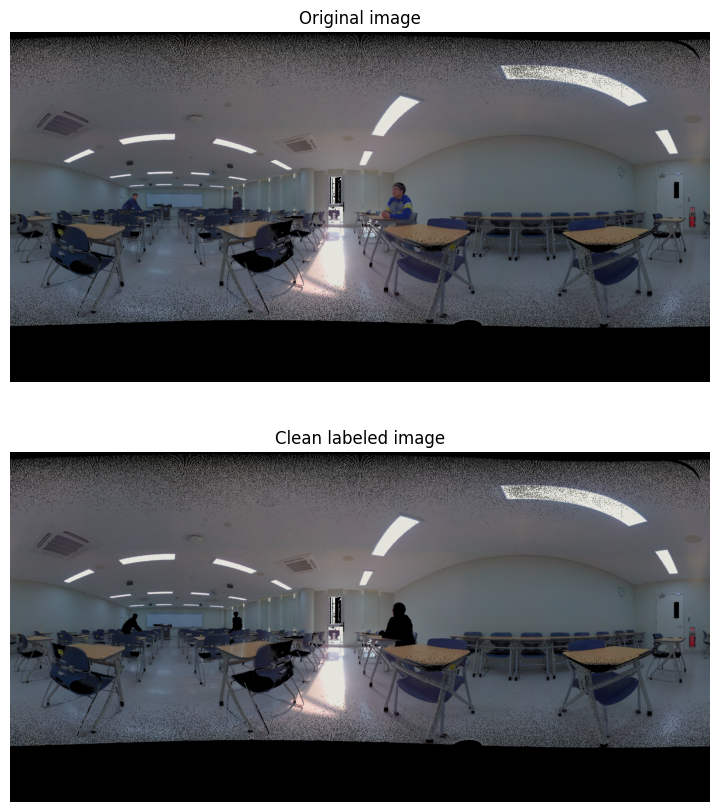

In [18]:
targets = ['Aisle', 'Elevator', 'LectureRoom1','LectureRoom2_1', 'LectureRoom2_2']
def args_comp(target):
    args1 = argparse.Namespace(
        model='BEiT_ADE',
        pcd_path='./../daeyoung/CustomPCD/(Test)'+target+'_origin.e57',
        img_width=1800,
        img_height=900,
        )
    args2 = argparse.Namespace(
        model='BEiT_ADE',
        pcd_path='./../daeyoung/CustomPCD/(Test)'+target+'_cleaned.e57',
        img_width=1800,
        img_height=900,
        )
    return args1, args2

## target index
target_idx = 4

(arg1, arg2) = args_comp(targets[target_idx])
prj_im_origin = project_PCD2ERP(arg1)
prj_im_cleaned = project_PCD2ERP(arg2)

cv2.imwrite("./../daeyoung/CustomPCD/imgs/"+targets[target_idx]+"_origin.png", prj_im_origin)
cv2.imwrite("./../daeyoung/CustomPCD/imgs/"+targets[target_idx]+"_cleaned.png", prj_im_cleaned)

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('Original image')
plt.imshow(prj_im_origin)
plt.axis('off')

plt.subplot(212)
plt.title('Clean labeled image')
plt.imshow(prj_im_cleaned)
plt.axis('off')

plt.show()

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/beit/upernet_beit-large_fp16_8x1_640x640_160k_ade20k/upernet_beit-large_fp16_8x1_640x640_160k_ade20k-8fc0dd5d.pth


/usr/local/lib/python3.9/dist-packages/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/usr/local/lib/python3.9/dist-packages/mmseg/models/losses/cross_entropy_loss.py:250: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Output()

/usr/local/lib/python3.9/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


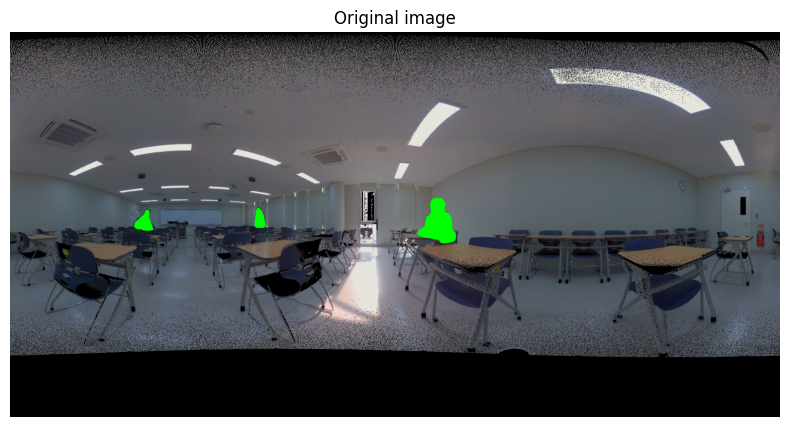

In [19]:
## image segmentation
human_mask = segmentation_img("./../daeyoung/CustomPCD/imgs/"+targets[target_idx]+"_origin.png", arg1)
pred_img = human_labeling(prj_im_origin, human_mask, mask_color=(0,255,0))


plt.figure(figsize=(10,5))
plt.title('Original image')
plt.imshow(pred_img)
plt.axis('off')
plt.show()

## image projection
pred_pcd = project_ERP_to_PCD(arg1, pred_img)

# point_format 3는 RGB 정보를 포함하는 포맷 (LAS 1.4에서 지원)
header = laspy.LasHeader(point_format=3, version="1.4")
# 좌표 값의 정밀도를 조정하기 위한 scale과 offset (데이터 범위에 맞게 조절)
header.scale = [0.001, 0.001, 0.001]
header.offset = [0, 0, 0]

# LAS 데이터 객체 생성
las = laspy.LasData(header)

# 좌표값 할당
las.x = pred_pcd[:, 0]
las.y = pred_pcd[:, 1]
las.z = pred_pcd[:, 2]
las.red   = pred_pcd[:, 3]
las.green = pred_pcd[:, 4]
las.blue  = pred_pcd[:, 5]
las.write("./../data/outputs/predPCDs/predPCD_"+targets[target_idx]+".las")

In [27]:
## The number of Original points
origin_pcd = e57.read_points(arg1.pcd_path)
print("Total number of points of Original PCD:", len(origin_pcd.points))

## The number of Clean labeled points
cleaned_pcd = e57.read_points(arg2.pcd_path)
print("Total number of points of Clean Labeled PCD:", len(cleaned_pcd.points))

## The number of Human Predicted points
target_num = 0
for preds in pred_pcd:
    rgb_values = preds[3:]
    ## Human Predicted points
    if np.array_equal(rgb_values, (255,1,1)):
        target_num += 1
print("The number of points to be erased:",target_num)

## The number of Overlapped points of human predicted
clPCD_set = set(map(tuple, np.round(cleaned_pcd.points)))
prPCD_set = set(map(tuple, np.round(pred_pcd[:,:3])))
overlp_pts = clPCD_set & prPCD_set
print("The number of points mispredicted:",len(overlp_pts))

Total number of points of Original PCD: 11356162
Total number of points of Clean Labeled PCD: 11175813


100%|██████████| 11356162/11356162 [00:59<00:00, 189840.17it/s]


The number of points to be erased: 175581
The number of points mispredicted: 1089


# visual field

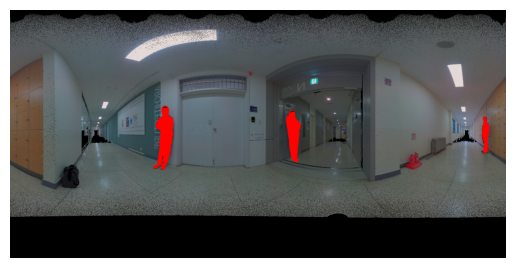

In [14]:
rgb_pcd = pred_pcd
prj_img = np.zeros((arg1.img_height, arg1.img_width, 3), dtype=np.uint8)

# 포인트 위치와 RGB 값 분리
xyz = rgb_pcd[:, :3]
rgb = rgb_pcd[:, 3:].astype(np.uint8)

# XYZ 좌표를 구형 좌표계 (방위각, 고도각)로 변환
x, y, z = xyz[:, 0], xyz[:, 1], xyz[:, 2]

# 방위각 (theta)와 고도각 (phi) 계산
theta = np.arctan2(y, x)  # 방위각
phi = np.arcsin(z / np.linalg.norm(xyz, axis=1))  # 고도각

# 방위각과 고도각을 이미지의 픽셀 좌표로 변환
u = ((theta + np.pi) / (2 * np.pi) * args.img_width).astype(int)  # [0, width] 범위로 매핑
v = ((1 - (phi + (np.pi / 2)) / np.pi) * args.img_height).astype(int)  # [0, height] 범위로 매핑

# 이미지 경계 값으로 클리핑
u = np.clip(u, 0, arg1.img_width - 1)
v = np.clip(v, 0, arg1.img_height - 1)

# 각 픽셀에 RGB 값을 매핑
prj_img[v, u] = rgb

plt.imshow(prj_img)
plt.axis('off')
plt.show()

In [20]:
target_num = 0
for rgb_values in pred_pcd[:,3:]:
    if np.array_equal(rgb_values, (255,1,1)):
        target_num += 1

print(target_num)

175581
